In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

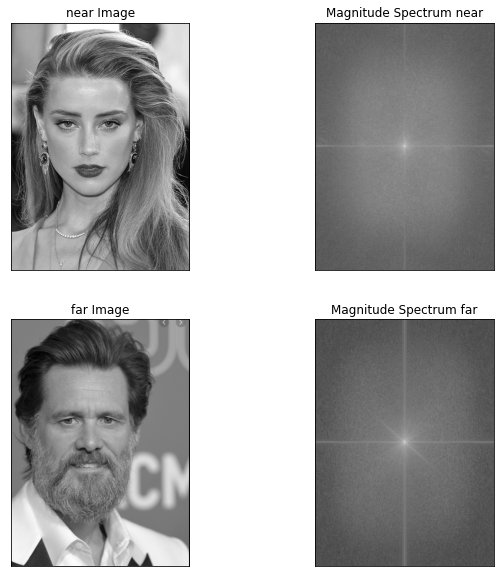

True

In [52]:
near = cv2.imread('q7_near.png',0)
far = cv2.imread('q7_far.png',0)
#fft of images
nearf = np.fft.fft2(near)
farf = np.fft.fft2(far)
#shift to the center
nearfshift = np.fft.fftshift(nearf)
farfshift = np.fft.fftshift(farf)
#normalization 
magnitude_spectrum_near = 20*np.log(np.abs(nearfshift))
magnitude_spectrum_far = 20*np.log(np.abs(farfshift))

plt.figure(figsize=(10,10))

plt.subplot(221),plt.imshow(near, cmap = 'gray')
plt.title('near Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum_near, cmap = 'gray')
plt.title('Magnitude Spectrum near'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(far, cmap = 'gray')
plt.title('far Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(magnitude_spectrum_far, cmap = 'gray')
plt.title('Magnitude Spectrum far'), plt.xticks([]), plt.yticks([])

plt.show()
#saving f=dft's
cv2.imwrite("q7_near_dft.jpg",magnitude_spectrum_near)
cv2.imwrite("q7_far_dft.jpg",magnitude_spectrum_far)

### GaussianFilter Function

In [53]:
import math
def GaussianFilter(nRows, nCols, sigma, highpass=True):
    filter_gauss = np.zeros((nRows,nCols))
    centerI = int((nRows+1)/2)
    centerJ = int((nCols+1)/2)
    for j in range(nCols):
        for i in range(nRows):
            g = math.exp(((i-centerI)**2+(j-centerJ)**2)/(-2*sigma**2))
            if(highpass):
                filter_gauss[i,j] = 1-g
            else:
                filter_gauss[i,j] = g
    return filter_gauss

### Highpass with r = 19, Lowpass with s = 24

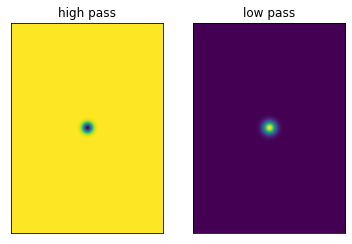

True

In [54]:
rows, cols = near.shape
r = 19 #sigma of highpass
s = 24 #sigma of lowpass
highpass = GaussianFilter(rows, cols, r, True) #less for better near Quality
lowpass = GaussianFilter(rows, cols, s, False) #more for better far Quality

plt.subplot(121),plt.imshow(highpass)
plt.title('high pass'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(lowpass)
plt.title('low pass'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite("q7_highpass.jpg",255*highpass)
cv2.imwrite("q7_lowpass.jpg",255*lowpass)

### Cut Off function (circle)

In [55]:
def Cutoff(nRows, nCols, R): #keeps pixels in circle R
    out = np.zeros((nRows,nCols))
    centerI = int((nRows+1)/2)
    centerJ = int((nCols+1)/2)
    for j in range(nCols):
        for i in range(nRows):
            x = i-centerI
            y = j-centerJ
            if(x**2+y**2<R**2):
                out[i,j] = 1
            else:
                out[i,j] = 0
    return out

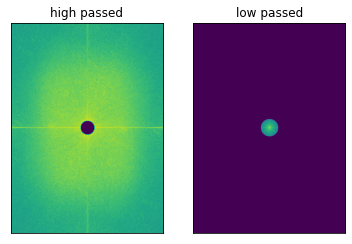

True

In [56]:
highpass = highpass*(1-Cutoff(rows, cols, r*2))
lowpass = lowpass*Cutoff(rows, cols, s*2)

highpassed = nearfshift*highpass
lowpassed = farfshift*lowpass
magnitude_spectrum_near_after = 20*np.log(np.abs(1+highpassed))
magnitude_spectrum_far_after = 20*np.log(np.abs(1+lowpassed))

plt.subplot(121),plt.imshow(magnitude_spectrum_near_after.astype(np.uint8))
plt.title('high passed'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(magnitude_spectrum_far_after)
plt.title('low passed'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite("q7_highpassed.jpg", magnitude_spectrum_near_after)
cv2.imwrite("q7_lowpassed.jpg", magnitude_spectrum_far_after)

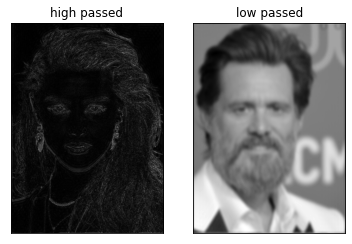

In [57]:
nearf_ishift = np.fft.ifftshift(highpassed)
farf_ishift = np.fft.ifftshift(lowpassed)

near_back = np.fft.ifft2(nearf_ishift)
far_back = np.fft.ifft2(farf_ishift)

near_back = np.abs(near_back)
far_back = np.abs(far_back)

plt.subplot(121),plt.imshow(near_back,cmap = 'gray')
plt.title('high passed'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(far_back,cmap = 'gray')
plt.title('low passed'), plt.xticks([]), plt.yticks([])

plt.show()

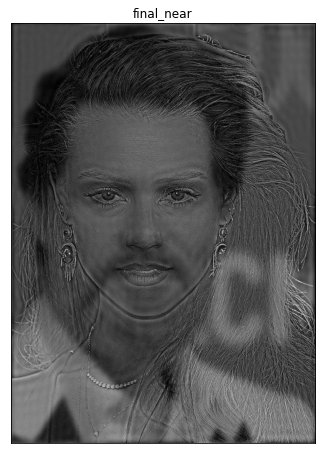

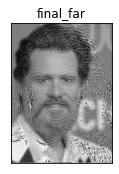

True

In [58]:
final = (1.4*highpassed + lowpassed)
final_ishift = np.fft.ifftshift(final)
final_back = np.fft.ifft2(final_ishift)
final_back = np.abs(final_back)

magnitude_spectrum_final = 20*np.log(np.abs(final))
plt.figure(figsize=(12,12))

plt.subplot(121),plt.imshow(final_back ,cmap = 'gray')
plt.title('final_near'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(4,4))

plt.subplot(122),plt.imshow(cv2.resize(final_back, (int(cols/4),int(rows/4))).astype("uint8") ,cmap = 'gray')
plt.title('final_far'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite("q7_frequency_hybrid.jpg", magnitude_spectrum_final)
cv2.imwrite("q7_final_near.jpg", final_back)
cv2.imwrite("q7_final_far.jpg", cv2.resize(final_back, (int(cols/4),int(rows/4))).astype(np.uint8))